## Домашнее задание 3 (10 баллов)


### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [ ]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [ ]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isnull().sum()
#Пропусков нет

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [ ]:
data.personal_status_sex.unique()

array(['female : non-single or male : single', 'male : married/widowed',
       'female : single', 'male : divorced/separated'], dtype=object)

In [ ]:
#Количественные: duration, amount, age, number_credits
#Бинарные: foreign_worker, credit_risk, telephone (do good credit risk -> True = good, False = Bad)
#Порядковые: status, credit_history, savings, employment_duration, installment_rate, personal_status_sex,
#other_debtors, present_residence, property, other_installment_plans, housing, job, people_liable,
#Категориальные: purpose

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby(by = ['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
data.age = data.age.astype(int)
#data.age
#data.housing.unique()


#Задание можно понимать по разному. Ищу отношение клиентов младше 30, снимающих жилье, к клиентам младше 30. Аналогично к 40+

print('Процент снимающих жилье среди клиентов младше 30 =', data['age'].loc[(data.age < 30) & (data.housing == 'rent')].count() / data['age'].loc[(data.age < 30)].count() * 100)
print('Процент снимающих жилье среди клиентов старше 40 =', data['age'].loc[(data.age > 40) & (data.housing == 'rent')].count() / data['age'].loc[(data.age > 40)].count() * 100)

Процент снимающих жилье среди клиентов младше 30 = 66.66666666666666
Процент снимающих жилье среди клиентов старше 40 = 68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
#data.number_credits.unique()

print ('Количество иностранцев с числом кредитов больше 3 =', data['foreign_worker'].loc[(data.foreign_worker == 'yes') & ((data.number_credits == '4-5') | (data.number_credits == '>= 6'))].count())

Количество иностранцев с числом кредитов больше 3 = 1


### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

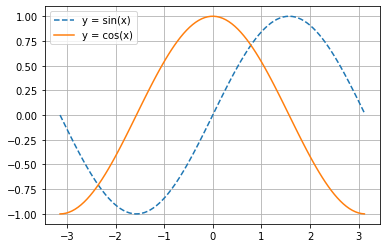

In [ ]:
x = np.arange(-np.pi, np.pi, 0.062)   # start,stop,step
y = np.sin(x)
z = np.cos(x)

plt.plot(x,y, linestyle = '--')
plt.plot(x,z)
plt.legend(['y = sin(x)', 'y = cos(x)'])
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

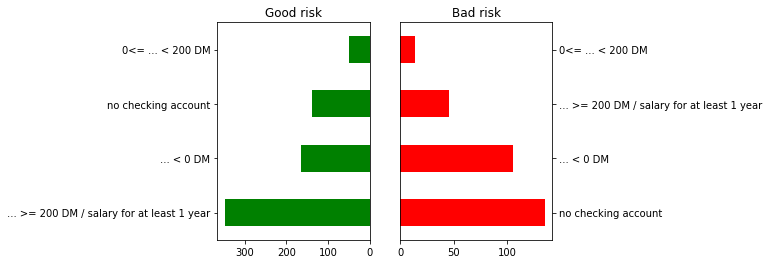

In [ ]:


fig, ax = plt.subplots(1, 2)
ax[0] = data.status[(data.credit_risk == 'good')].value_counts().plot(kind = 'barh', ax = ax[0], color = 'green')
ax[1] = data.status[(data.credit_risk == 'bad')].value_counts().plot(kind = 'barh', ax = ax[1], color = 'red')

ax[0].set_title('Good risk')
ax[1].set_title('Bad risk')

ax[0].invert_xaxis()
ax[1].yaxis.tick_right()


plt.show()


### Задание 8  (0.5 балла)

In [ ]:

import seaborn as sns

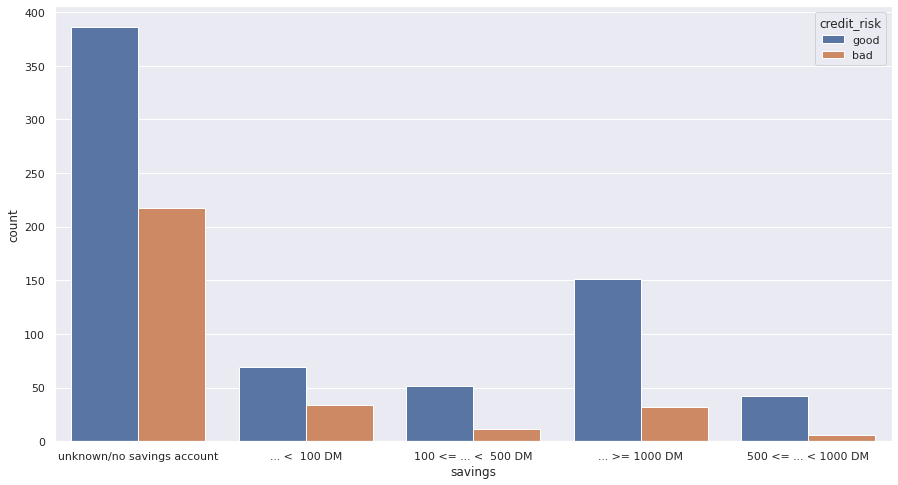

In [ ]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.countplot(x = 'savings', hue = 'credit_risk', data = data)

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

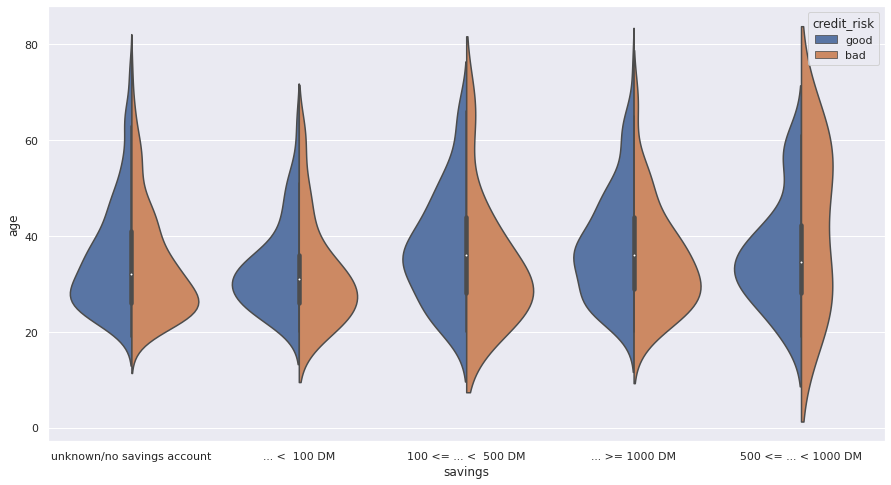

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.violinplot(x = 'savings',y = 'age', hue = 'credit_risk', data = data, split = True)
#ax.tick_params(axis = 'x', labelrotation = 90)

#ax.set_xscale('linear')

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

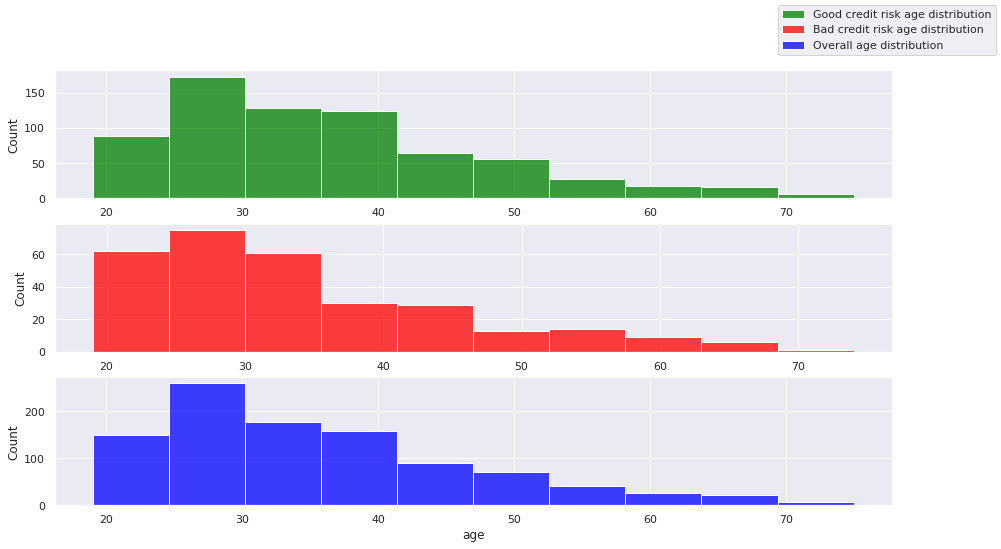

In [ ]:
fig, ax = plt.subplots(3,1)
sns.histplot(x = data.age.loc[data.credit_risk == 'good'], ax=ax[0], bins = 10, color = 'green', label = 'Good credit risk age distribution')
sns.histplot(x = data.age.loc[data.credit_risk == 'bad'], ax=ax[1], color = 'red', bins = 10, label = 'Bad credit risk age distribution')
sns.histplot(x = 'age', ax=ax[2], data = data, color = 'blue', bins = 10, label = 'Overall age distribution')
fig.legend()


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

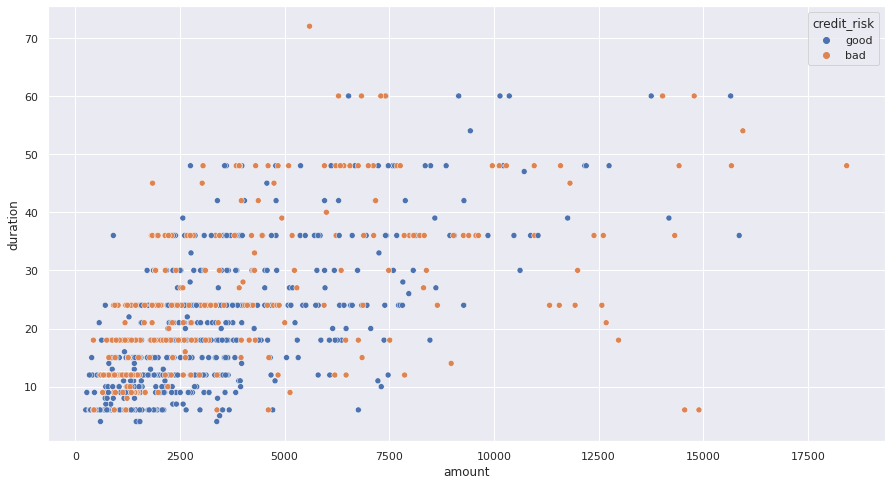

In [ ]:
#ax = sns.pointplot(x = 'status', y = 'duration', hue = 'credit_risk', data = data)
ax = sns.scatterplot(x = 'amount', y = 'duration', hue = 'credit_risk', data = data)

In [ ]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

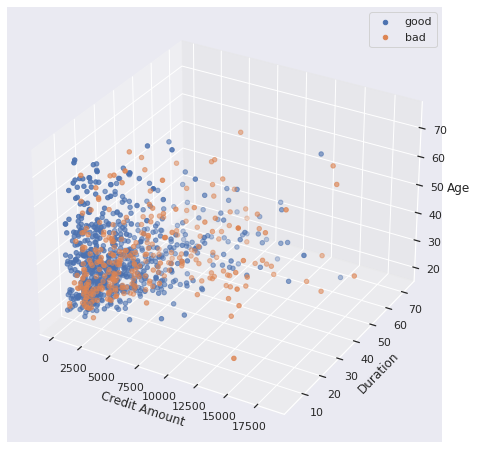

In [ ]:
#https://stackoverflow.com/questions/66183999/how-to-make-3d-scatter-plot-with-a-hue

df = pd.DataFrame({'amount':data['amount'],
                   'duration':data['duration'],
                   'age':data['age'],
                   'credit_risk':data['credit_risk']
                  })

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Credit Amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

for s in df.credit_risk.unique():
    ax.scatter(df.amount[df.credit_risk==s],df.duration[df.credit_risk==s],df.age[df.credit_risk==s],label=s)

ax.legend()


In [ ]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
#Количественные: duration, amount, age, number_credits
#Бинарные: foreign_worker, credit_risk, telephone (do good credit risk -> True = good, False = Bad)
#Порядковые: status, credit_history, savings, employment_duration, installment_rate, personal_status_sex,
#other_debtors, present_residence, property, other_installment_plans, housing, job, people_liable,
#Категориальные: purpose
#https://scikit-learn.org/stable/modules/preprocessing.html
#https://stackoverflow.com/questions/56502864/using-ordinalencoder-to-transform-categorical-values
df = data.copy()
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
enc.fit(df[["foreign_worker", "credit_risk", "telephone"]])
df[["foreign_worker", "credit_risk", "telephone"]] = enc.transform(df[["foreign_worker", "credit_risk", "telephone"]])

enc.fit(df[["status", "credit_history", "savings", "employment_duration", "installment_rate", "personal_status_sex",
"other_debtors", "present_residence", "property", "other_installment_plans", "housing", "job", "people_liable", "number_credits"]])
df[["status", "credit_history", "savings", "employment_duration", "installment_rate", "personal_status_sex",
"other_debtors", "present_residence", "property", "other_installment_plans", "housing", "job", "people_liable", "number_credits"]] = enc.transform(df[["status", "credit_history", "savings", "employment_duration", "installment_rate", "personal_status_sex",
"other_debtors", "present_residence", "property", "other_installment_plans", "housing", "job", "people_liable", "number_credits"]])

df.drop('purpose', axis = 1, inplace = True)

#Масштабирую возраст по категориям 20-30, 30-40, .., 60+ исходя из графика выше

def getAgeInterval(x) -> int:
    if x < 20 or (x >= 20 and x <= 30):
        return 5
    elif x > 30 and x <= 40:
        return 4
    elif x > 40 and x <=50:
        return 3
    elif x > 50 and x <= 60:
        return 2
    else:
        return 1

Age = df['age'].apply(lambda x: getAgeInterval(x))
df['age'] = Age

df.head()


,status,duration,credit_history,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3.0,18,0.0,1049,4.0,2.0,2.0,0.0,2.0,3.0,1.0,5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,3.0,9,0.0,2799,4.0,0.0,1.0,3.0,2.0,0.0,3.0,4,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.0,12,4.0,841,0.0,1.0,1.0,0.0,2.0,3.0,3.0,5,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0
3,3.0,12,0.0,2122,4.0,0.0,0.0,3.0,2.0,0.0,3.0,4,1.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0
4,3.0,12,0.0,2171,4.0,0.0,2.0,3.0,2.0,3.0,1.0,4,0.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
import numpy as np
def predict(Xtest: np.array) -> np.array:
    # your code here
    result = []
    for test in Xtest:
        #result.append(1)
        temp = test[3]*0.0019 + sum(test[5:10]) - sum(test[11:19]) - (test[2]) + int(2*test[0] - int(test[4] * 0.9))
        #print(temp)
        if temp > -16:
            result.append(1)
        else:
            result.append(0)

    return result

#df = data.copy()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#df.reset_index(drop = True)
#df.head()
X = df.drop('credit_risk', 1).values
y = df['credit_risk'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

print(accuracy_score(y_train, predict(X_train)))
accuracy_score(y_test, predict(X_test))

0.7133333333333334


/tmp/ipykernel_537/329655464.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('credit_risk', 1).values


0.66